<a href="https://colab.research.google.com/github/Melisaoktavia/TugasModelWarna_Minggu2/blob/main/PCD_MGG2_TGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 188c8dc8bdbfd118070eb2dc52bf4241.jpg to 188c8dc8bdbfd118070eb2dc52bf4241.jpg
Jumlah gambar: 1

===== ANALISIS GAMBAR 1 =====
Waktu konversi: 0.16671013832092285 detik
Memori asli: 1079712 bytes
Memori kuantisasi: 359904 bytes
Rasio kompresi: 3.0


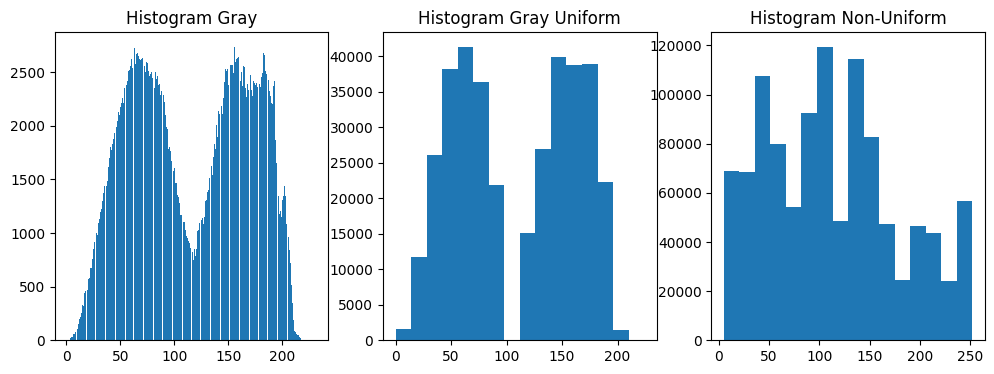

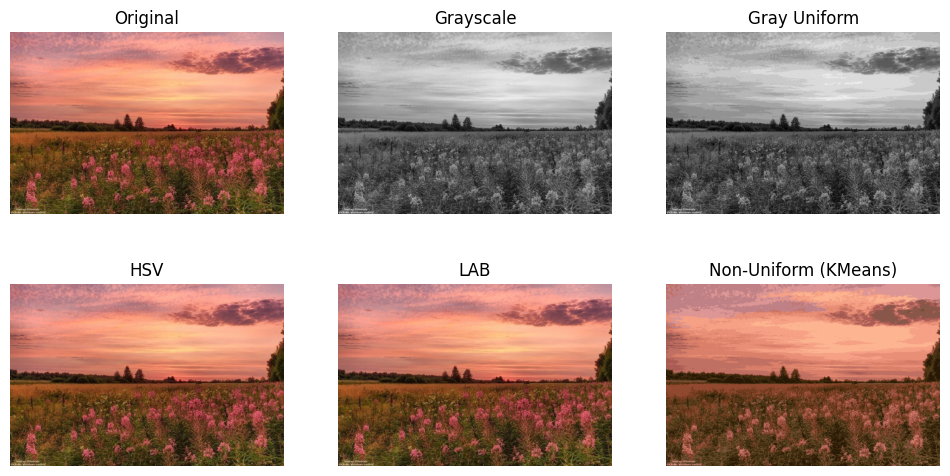

In [ ]:
# ==========================================
# INSTALL & IMPORT
# ==========================================
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files
from sklearn.cluster import KMeans

# ==========================================
# UPLOAD 3 GAMBAR
# ==========================================
uploaded = files.upload()

images = []
for file in uploaded.keys():
    img = cv2.imread(file)
    images.append(img)

print("Jumlah gambar:", len(images))


# ==========================================
# FUNGSI KUANTISASI
# ==========================================
def uniform_quantization(image, levels=16):
    step = 256 // levels
    return (image // step) * step

def non_uniform_quantization(image, clusters=16):
    data = image.reshape((-1,3))
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(data)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    quantized = centers[labels.flatten()]
    return quantized.reshape(image.shape)


# ==========================================
# ANALISIS
# ==========================================
for idx, img in enumerate(images):

    print(f"\n===== ANALISIS GAMBAR {idx+1} =====")

    # --------------------------
    # WAKTU KONVERSI
    # --------------------------
    start = time.time()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    conversion_time = time.time() - start

    print("Waktu konversi:", conversion_time, "detik")

    # --------------------------
    # KUANTISASI
    # --------------------------
    gray_u = uniform_quantization(gray, 16)
    hsv_u = uniform_quantization(hsv, 16)
    lab_u = uniform_quantization(lab, 16)

    color_non_uniform = non_uniform_quantization(img, 16)

    # --------------------------
    # MEMORY SIZE
    # --------------------------
    original_memory = img.nbytes
    quantized_memory = gray_u.nbytes

    compression_ratio = original_memory / quantized_memory

    print("Memori asli:", original_memory, "bytes")
    print("Memori kuantisasi:", quantized_memory, "bytes")
    print("Rasio kompresi:", compression_ratio)

    # --------------------------
    # HISTOGRAM
    # --------------------------
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.hist(gray.ravel(), bins=256)
    plt.title("Histogram Gray")

    plt.subplot(1,3,2)
    plt.hist(gray_u.ravel(), bins=16)
    plt.title("Histogram Gray Uniform")

    plt.subplot(1,3,3)
    plt.hist(color_non_uniform.ravel(), bins=16)
    plt.title("Histogram Non-Uniform")

    plt.show()

    # --------------------------
    # VISUALISASI
    # --------------------------
    plt.figure(figsize=(12,6))

    plt.subplot(2,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,3,2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis("off")

    plt.subplot(2,3,3)
    plt.imshow(gray_u, cmap='gray')
    plt.title("Gray Uniform")
    plt.axis("off")

    plt.subplot(2,3,4)
    plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
    plt.title("HSV")
    plt.axis("off")

    plt.subplot(2,3,5)
    plt.imshow(cv2.cvtColor(lab, cv2.COLOR_LAB2RGB))
    plt.title("LAB")
    plt.axis("off")

    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(color_non_uniform, cv2.COLOR_BGR2RGB))
    plt.title("Non-Uniform (KMeans)")
    plt.axis("off")

    plt.show()